### **Caro leitor(ra) seja muito bem vindo(a), vamos explorar essa base comigo !?**
### `Importando Bibliotecas e Carregando o Dataset`
---
Seguiremos de forma bem detalhada uma análise de dados exploratória (**EDA**), buscaremos por insights nessa jornada!

No código abaixo importa-se as bibliotecas, carrega-se o dataset e exibe-se as primeiras 5 linhas :

Com o Data frame já carregado e exibido, consegue-se vizualisar previamente os dados a serem tratados e manipulados, na sequência há um passo muito importante, discernir melhor as colunas!

In [2]:
# Importar bibliotecas e definir aliases:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset na variável 'df':
df = pd.read_csv("netflix_data.csv", header=0)

# Visualizar 5 primeiras linhas :
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


###  `Entendimento Inicial dos Dados`
---

Compreender a estrutura e o conteúdo do *DataFrame* é uma etapa essencial para uma análise exploratória eficaz. Ter uma boa visão de negócio é uma habilidade fundamental para Engenheiros, Cientistas e Analistas de dados mas, é de suma importância lembrar que **viés cognitivo** pode influenciar interpretações. 

Por isso, é crucial deixar que os próprios dados guiem as decisões analíticas. Toda EDA deve ser construída com base em evidências extraídas diretamente do dataset, evitando suposições não fundamentadas.
A partir deste ponto, será feita uma investigação detalhada sobre colunas, tipos de dados, valores nulos, estatísticas básicas e de possíveis padrões/tendências em nichos de mercado da NETFLIX.



### `Dimensão do Data Frame`
__________________________________________________________________________________________________________________________________________________


In [109]:
# Dimensão do Data Frame
df.shape

(4812, 11)

contém 4812 linhas e 11 colunas.
### `Conteúdo das Colunas do Data Frame`

__________________________________________________________________________________________________________________________________________________

In [110]:
# Vizualizar nomes das colunas:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

Traduzindo :

```
show_id:      Um identificador único para cada filme ou série.
type:         Indica se é um filme ou série. 
title:        O título do filme ou série. 
director:     O diretor do filme ou série. 
cast:         Os atores ou atrizes que participaram. 
country:      O país onde o filme ou série foi produzido.
date_added:   Quando o filme ou série foi adicionado à plataforma. 
release_year: O ano de lançamento do filme ou série. 
duration:     A duração do filme ou o número de temporadas de uma série. (Observação: o valor desta coluna depende do valor da coluna type)
description:  Uma breve descrição ou sinopse do filme ou série. 
genre:        O gênero do filme ou série (ex: ação, comédia, drama).
```

### `Tipos de Dados do Dataset`
---

Verificando tipos de dados, informações gerais e se o Data Frame contém valores nulos:

In [111]:
# Verificar tipos de dados e informações gerais do Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


- Conforme a saída, duas colunas são do tipo inteiro ```int64``` e 9 colunas são do tipo ```object```, o Data frame não contém valores nulos, Isso simplifica a parte de limpeza dos dados.

- As colunas ```release_year (Ano de Lançamento)``` e ```duration (Duração)``` já estão como ```int64 (números inteiros)```, o que é apropriado.

- A coluna ```data_added``` está como ```object``` o que para o **pandas** significa "texto"```(string)```. Para fazer análises temporais(como por exemplo: "quantos filmes foram adicionados por ano?"), precisamos converter essa coluna para um formato de data ```(datatime)```.


### `Convertendo tipos de dados, Tratando e limpado (Data Cleaning)`
---

Realizando a primeira tarefa de pré-processamento de dados, converte-se no código abaixo a coluna ```data_added``` para ```datatime``` e é checado se o código funcionou utilizando a mesma função anterior ```.info()```


Mas em primeira instância o código :

---

```df['date_added'] = pd.to_datetime(df['date_added'])```

Retornou: ***```_________________ValueError_______________```***

---

***E o motivo: havia "sujeira" nos dados na coluna ```date_added``` foi encontrado um " " (espaço em branco) antes da data ```" August 4, 2017"```
O Pandas olhou as primeiras datas do arquivo deduziu que o formato era "Nome do Mês, Dia, Ano" e tentou aplicar essa regra a todas as outras. Quando ele chegou na linha 161 a regra quebrou por causa do espaço extra no começo por isso a saída ValueError.***

---
Próxima tarefa remover os **espaços** extras no início e fim das datas da coluna, para posteriormente fazer a conversão:


In [112]:
# Removendo espaços antes e depois da coluna
df['date_added'] = df['date_added'].str.strip()

# Converter a coluna data_added para datatime
df['date_added'] = pd.to_datetime(df['date_added'])

# Ver o tipo de dado da coluna
print(df['date_added'].dtype)

datetime64[ns]


Conversão concluída com Sucesso! Isso significa que a fase de Limpeza de Dados está praticamente concluída!

Próximo passo verificar se ainda há valores **Nulos** no Data Frame:

In [113]:
# Verificando a situação dos valores nulos após a limpeza da coluna 'date_added'
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

Ótimo o Data frame não contém mais valores **Nulos**.

### Clusterizando os Dados

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________
#### Interrogando os Dados ! Respostas sem Viéses!

* Quantos filmes e quantas séries contem nesse conjunto ?






In [114]:
# Separando filmes de Séries 
movies = df[df['type'] == 'Movie'].copy()
series = df[df['type'] == 'TV Show'].copy()
print(f"Número de Filmes: {len(movies)}") 
print(f"Número de Séries: {len(series)}")

Número de Filmes: 4677
Número de Séries: 135


* Quais são os gêneros mais populares ?

In [115]:
# Separação e contagem dos gêneros
generos_separados = movies['genre'].str.split(', ').explode()
contagem_generos = generos_separados.value_counts()
print(f'A quantidade de generos do data set é: ', len(contagem_generos))
print(contagem_generos)

A quantidade de generos do data set é:  18
genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 276
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
Uncategorized             25
Independent Movies        20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Romantic Movies            3
LGBTQ Movies               1
Name: count, dtype: int64


Os gêneros mais populares nessa base são: em 1° lugar `Drama` com 1343 títulos, e em 2° lugar `Comédias` com 1029 títulos. Os dados nos mostram uma fote tendência para Dramas na plataforma.

* Qual país produz mais conteúdo para a Netflix?


In [116]:
# Quantidade total de paises
print("O numero total de paises é:")
len(df["country"].value_counts())

O numero total de paises é:


72

In [117]:
# Exibindo os primeiros 10 Nomes de paises e quantidade de Títulos
df["country"].value_counts().head(10)

country
United States     1886
India              864
United Kingdom     311
Canada             155
France             133
Spain              112
Egypt               91
Turkey              81
Japan               81
Philippines         74
Name: count, dtype: int64

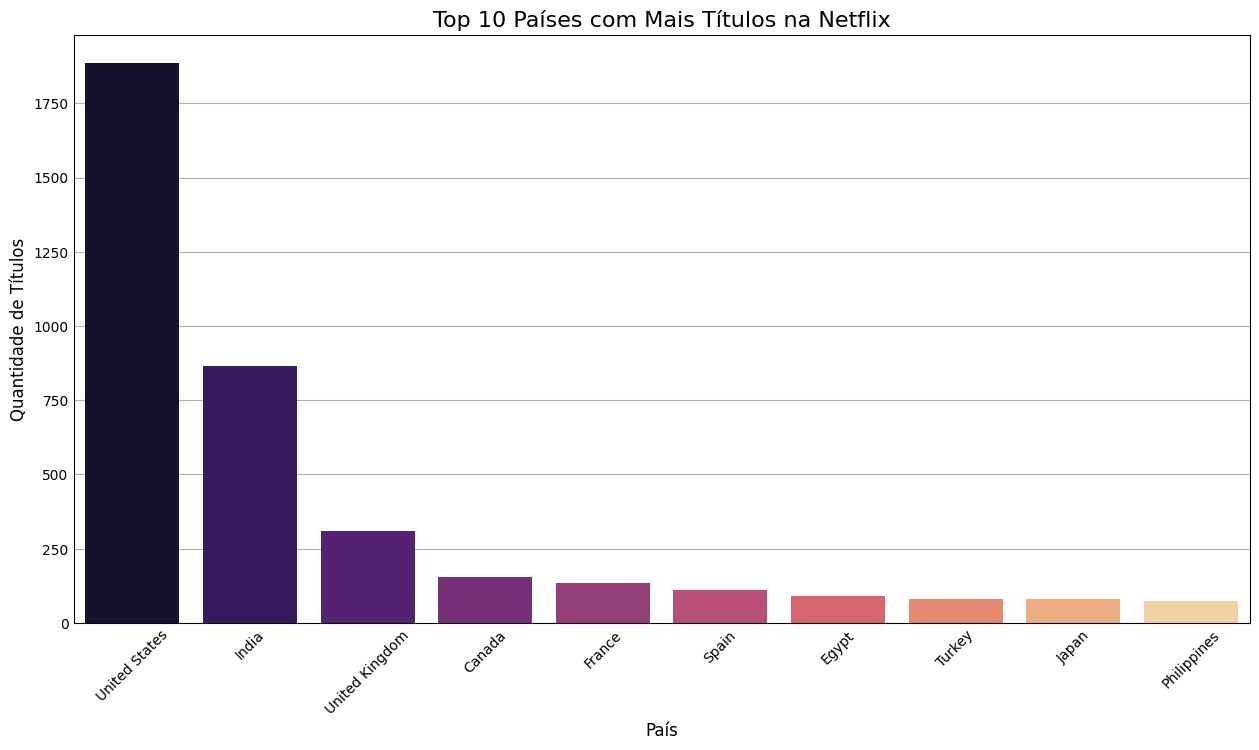

In [118]:
# Armazenamos os dados filtrados em uma variável para facilitar
top_10_paises = df["country"].value_counts().head(10)

# Tamanho da figura (Largura, Altura)
plt.figure(figsize=(12, 6))

# Criação do gráfico de barras
# x = índice (nomes dos países), y = valores (contagem)
sns.barplot(x=top_10_paises.index, 
            y=top_10_paises.values, 
            hue=top_10_paises.index,
            legend=False,
            palette="magma")

# Títulos e rótulos
plt.title("Top 10 Países com Mais Títulos na Netflix", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Quantidade de Títulos", fontsize=12)

# Fonte do Pais em 45º para não ficarem amontoados
plt.xticks(rotation=45)

# Exibindo o Gráfico
plt.show()

Estados Unidos é lider disparado com mais 1 mil títulos lançados a mais do que todos os paises concorrentes. A plataforma certamente investe em conteudos Americanos, mas, os motivos pelos quais ela investe, não podem ser respondidos apenas com essa base de dados, para tais respostas de Negócio necessita-se de mais informações(dados) como por exemplo, consumo dos clientes, número de likes, região dos likes, número views completas, região das views, e etc, para se fazer um **cruzamento nos dados** e assim chegar em respostas mais concisas até mesmo sobre ROI (Retorno Sobre Investimento).




* Como a duração de filmes mudou ao longo dos anos?


In [ ]:
# Remover linhas nulas
df = df.dropna(subset=['date_added'])

# Remover espaços em branco no início e fim da string
df['date_added'] = df['date_added'].str.strip()

# Converter para o formato de data
df['date_added'] = pd.to_datetime(df['date_added'])

# Verificando o resultado
print(df['date_added'].head())

0   2016-12-23
1   2018-12-20
2   2017-11-16
3   2020-01-01
4   2017-07-01
Name: date_added, dtype: datetime64[ns]


In [125]:
print("Verificando novamente o tipo de dados:")
print(df['date_added'].dtype)

Verificando novamente o tipo de dados:
datetime64[ns]


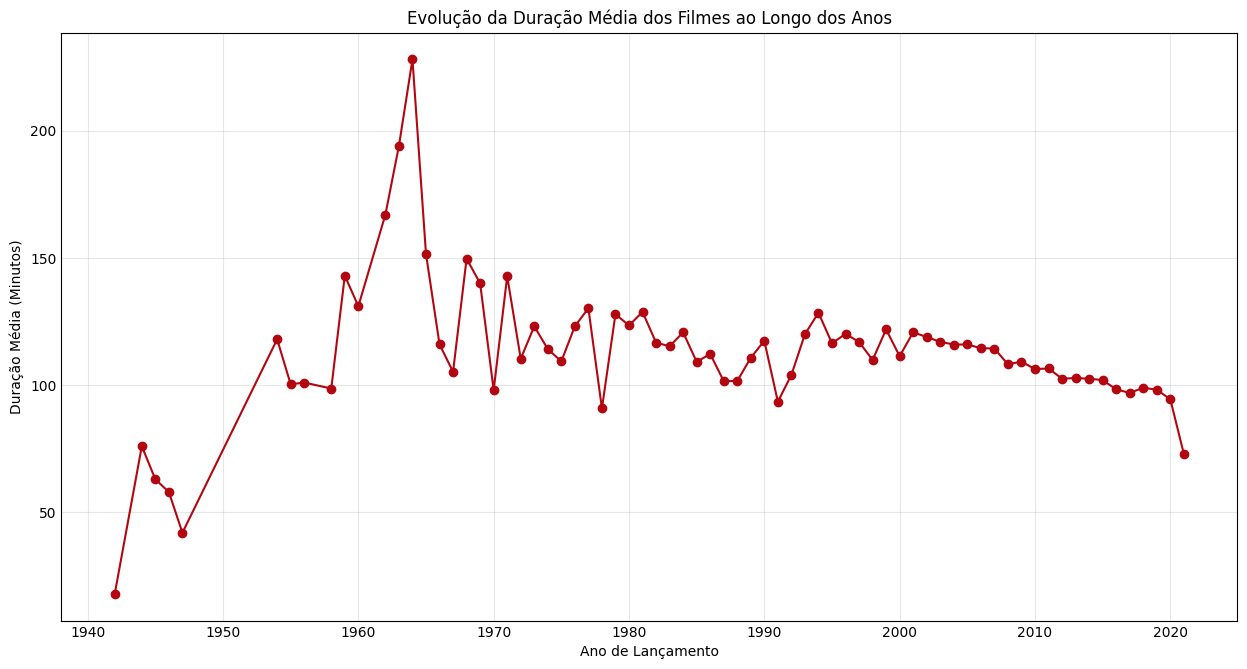

In [135]:
# Calcular a média de duração por ano 
duracao_media = movies.groupby("release_year")["duration"].mean()

# Plotar o gráfico
plt.figure(figsize=(12,6))
plt.plot(duracao_media.index, duracao_media.values, marker="o", linestyle="-", color="#b20710")
plt.title("Evolução da Duração Média dos Filmes ao Longo dos Anos")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Duração Média (Minutos)")
plt.grid(True, alpha=0.3)
plt.show()


O Gráfico ilustra muito bem o Pico dos Anos 60 ano ali perto de 1964-1965 onde a média bateu quase 230 minutos quase 4 horas por titulo. Isso é muito curioso.

A Estabilidade vinda de 1980-2010 a média se manteve ali entre 100 e 120 minutos de 1 a duas horas, que é o padrão do cinema moderno.

E por fim a Queda Recente (2015-2020): A linha está caindo suavemente, indicando que os filmes estão ficando mais curtos ou que a Netflix está adicionando muitos curtas-metragens recentemente.

Mas a pergunta que podemos levantar ao ver esse outlier nos anos 60 é:

* Será que é um erro na base ou são filmes épicos antigos? 

In [ ]:
# Filtrar filmes lançados entre 1960 e 1970
filmes_anos_60 = movies[(movies['release_year'] >= 1960) & (movies['release_year'] <= 1970)]

# Ordenar do maior para o menor para ver os campeões de duração
top_filmes_60 = filmes_anos_60.sort_values(by='duration', ascending=False)

# Mostrar título, ano e duração
print(top_filmes_60[['title', 'release_year', 'duration']].head(50))

                                title  release_year  duration
3349                           Sangam          1964       228
1138                   Doctor Zhivago          1965       200
3333                          Saladin          1963       194
2701             Mutiny on the Bounty          1962       185
2900     Once Upon a Time in the West          1968       166
3098                        Professor          1962       163
3516                        Singapore          1960       158
2321                           Lolita          1962       153
3093                           Prince          1969       152
872           Chitty Chitty Bang Bang          1968       146
3288                  Rosemary's Baby          1968       137
4069                         The Land          1970       130
4500                        True Grit          1969       128
956                    Cool Hand Luke          1967       127
2856                   Ocean's Eleven          1960       127
328     

Podemos ver que o Título Sangam (1964) Um clássico de Bollywood com quase 4 horas (228 min). Como a Netflix tem poucos filmes de 1964 no catálogo, esse único filme puxou a média daquele ano lá para cima. 

Doctor Zhivago (1965) e outros épicos os anos 60 foram a era dos "Épicos", filmes feitos para serem eventos grandiosos.

O gráfico de linha que fizemos mostra a Média. O problema da média é que ela esconde a realidade quando temos poucos dados.
**Exemplo: Se em 1964 tivéssemos só 2 filmes (um de 90 min e o Sangam de 228 min), a média seria 159 min. Parece que todo filme era longo, mas na verdade foi só um "intruso".**







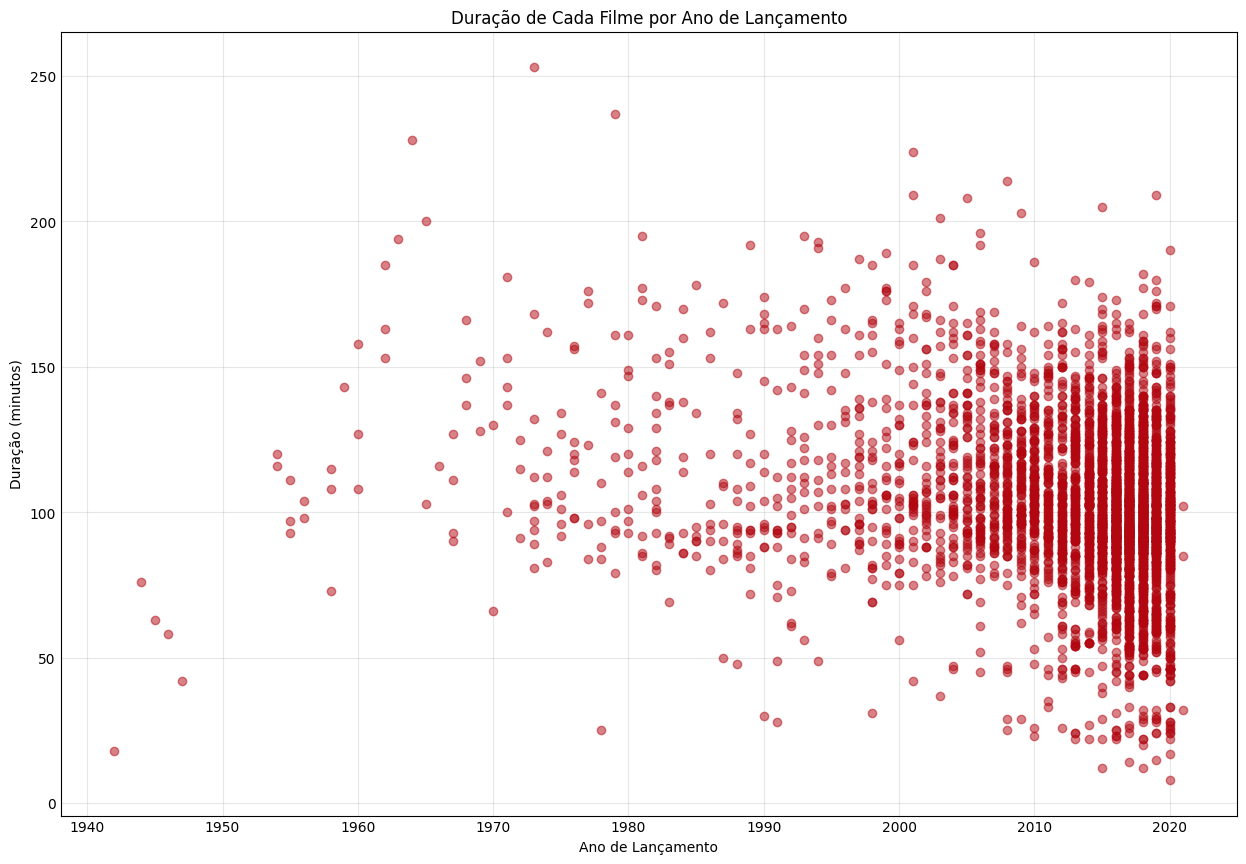

In [ ]:
# Criando Gráfico de dispersão
plt.figure(figsize=(12,8))

# Plotar cada Filme com um ponto 
plt.scatter(movies['release_year'], movies['duration'], color='#b20710', alpha=0.5)
plt.title('Duração de Cada Filme por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.grid(True, alpha=0.3)
plt.show()

O gráfico de dispersão ``scatter plot`` revela exatamente o que suspeitávamos e conta uma história muito mais completa que a média simples:

A "Nuvem" Recente veja como a partir dos **anos 2000** a mancha vermelha fica super densa entre **90 e 110 minutos**. Isso confirma a padronização da indústria.

Os Pontos Solitários nos anos 60, são poucos pontos (justamnete porque contém poucos filmes no catálogo), e eles estão espalhados lá no alto. Por isso a média dava aquele salto gigante. Bastou um Sangam para puxar a linha para cima.

Os "Micro-filmes" tem alguns pontos lá embaixo, perto do zero, especialmente nos anos recentes. Curiosissimo isso pois nos anos atuais há uma fote tendência de algoritmos de redes sociais utilizarem de videos curtos.